# PROJET 5 :  ETUDE DE MARCHÉ
- Entreprise d'agroalimentaire spécialisée dans le poulet  souhaite se développer à l'international.
- Objectif : identifier les pays propices à une insertion dans le marché du poulet
- Etudier les régimes alimentaires de chaque pays, notamment en termes de protéines d'origine animale et en termes de calories.

# Mission I : Construisez votre échantillon contenant l'ensemble des pays disponibles, chacun caractérisé par ces variables :
- différence de population entre une année antérieure (au choix) et l'année courante, exprimée en pourcentage ;
- proportion de protéines d'origine animale par rapport à la quantité totale de protéines dans la disponibilité alimentaire du pays ;
- disponibilité alimentaire en protéines par habitant ;
- disponibilité alimentaire en calories par habitant.

## Import des librairies

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from matplotlib import*
import matplotlib.pyplot as plt
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.decomposition import PCA as sklearnPCA
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option('mode.use_inf_as_na', True)

## A- Analyse données population

In [2]:
import os
os.getcwd()
os.chdir('/Users/mouniamfoungoulie/Documents/Openclassrooms-Dataanalyst/Projet 5')
os.getcwd()

'/Users/mouniamfoungoulie/Documents/Openclassrooms-Dataanalyst/Projet 5'

In [3]:
#Import fichier population
population = pd.read_csv("./Data/fr_population.csv")

In [4]:
print(population.shape)
population.head()

(474, 15)


,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
0,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,33370.794,X,Sources internationales sûres,NaN
1,OA,Séries temporelles annuelles,2,Afghanistan,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,37171.921,X,Sources internationales sûres,NaN
2,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,54544.186,X,Sources internationales sûres,NaN
3,OA,Séries temporelles annuelles,202,Afrique du Sud,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,57792.518,X,Sources internationales sûres,NaN
4,OA,Séries temporelles annuelles,3,Albanie,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,2896.305,X,Sources internationales sûres,NaN


In [5]:
#Vérifier si valeurs manquantes
population.info() #Aucunes valeures manquantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Code Domaine            474 non-null    object 
 1   Domaine                 474 non-null    object 
 2   Code zone (FAO)         474 non-null    int64  
 3   Zone                    474 non-null    object 
 4   Code Élément            474 non-null    int64  
 5   Élément                 474 non-null    object 
 6   Code Produit            474 non-null    int64  
 7   Produit                 474 non-null    object 
 8   Code année              474 non-null    int64  
 9   Année                   474 non-null    int64  
 10  Unité                   474 non-null    object 
 11  Valeur                  474 non-null    float64
 12  Symbole                 474 non-null    object 
 13  Description du Symbole  474 non-null    object 
 14  Note                    4 non-null      ob

In [6]:
#Vérifier sources données
population["Description du Symbole"].value_counts()

Sources internationales sûres                                                             470
Agrégat, peut inclure des données officielles, semi-officielles, estimées ou calculées      4
Name: Description du Symbole, dtype: int64

In [7]:
#Vérifier sources données
population["Symbole"].value_counts()

X    470
A      4
Name: Symbole, dtype: int64

In [8]:
#Données proviennent de 2 sources différentes, vérifier les pays avec données agrégat
population[population["Symbole"]=="A"].head()

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
18,OA,Séries temporelles annuelles,151,Antilles néerlandaises (ex),511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,267.006,A,"Agrégat, peut inclure des données officielles,...",NaN
19,OA,Séries temporelles annuelles,151,Antilles néerlandaises (ex),511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,277.483,A,"Agrégat, peut inclure des données officielles,...",NaN
82,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,1430670.819,A,"Agrégat, peut inclure des données officielles,...",NaN
83,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,1459377.612,A,"Agrégat, peut inclure des données officielles,...",NaN


In [9]:
#Vérification des pays contenant la Chine
population[population['Zone'].str.contains('Chine')]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
82,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,1430670.819,A,"Agrégat, peut inclure des données officielles,...",NaN
83,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,1459377.612,A,"Agrégat, peut inclure des données officielles,...",NaN
84,OA,Séries temporelles annuelles,96,Chine - RAS de Hong-Kong,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,7134.670,X,Sources internationales sûres,NaN
85,OA,Séries temporelles annuelles,96,Chine - RAS de Hong-Kong,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,7371.730,X,Sources internationales sûres,NaN
86,OA,Séries temporelles annuelles,128,Chine - RAS de Macao,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,590.208,X,Sources internationales sûres,NaN
87,OA,Séries temporelles annuelles,128,Chine - RAS de Macao,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,631.636,X,Sources internationales sûres,NaN
88,OA,Séries temporelles annuelles,41,"Chine, continentale",511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,1399453.965,X,Sources internationales sûres,NaN
89,OA,Séries temporelles annuelles,41,"Chine, continentale",511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,1427647.786,X,Sources internationales sûres,NaN
90,OA,Séries temporelles annuelles,214,"Chine, Taiwan Province de",511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,23491.976,X,Sources internationales sûres,NaN
91,OA,Séries temporelles annuelles,214,"Chine, Taiwan Province de",511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,23726.460,X,Sources internationales sûres,NaN


In [10]:
#Vérification des pays contenant Antilles
population[population['Zone'].str.contains('Antilles')]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
18,OA,Séries temporelles annuelles,151,Antilles néerlandaises (ex),511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,267.006,A,"Agrégat, peut inclure des données officielles,...",NaN
19,OA,Séries temporelles annuelles,151,Antilles néerlandaises (ex),511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,277.483,A,"Agrégat, peut inclure des données officielles,...",NaN


#### Analyse 
- la Chine contient des doublons avec des données agrégats et données de sources internationales. 
- Suppression des données sources internationales, pour garder les données agrégats qui sont plus générales. 
- On garde tous les éléments des Antilles

In [11]:
#Supprimer les autres Chine (96, 128, 41 et 214), et garder la Chine globale
pop = population[~population['Code zone (FAO)'].isin([96, 128, 41, 214])]

In [12]:
#v&rification pays contenant Chine
pop[pop['Zone'].str.contains('Chine')]

,Code Domaine,Domaine,Code zone (FAO),Zone,Code Élément,Élément,Code Produit,Produit,Code année,Année,Unité,Valeur,Symbole,Description du Symbole,Note
82,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2014,2014,1000 personnes,1430670.819,A,"Agrégat, peut inclure des données officielles,...",NaN
83,OA,Séries temporelles annuelles,351,Chine,511,Population totale,3010,Population-Estimations,2018,2018,1000 personnes,1459377.612,A,"Agrégat, peut inclure des données officielles,...",NaN


In [13]:
# Renommer les colonnes
pop.columns = ["xx","xx2","country_code","country",'xx3','element','item_code','item','xx4',"year","unit",'pop_value','flag','flag_desc','note']

# Selection des colonnes 
pop = pop[['country_code', 'country','year','pop_value']]


### Calcul Variation de la population

In [14]:
pop.head()

,country_code,country,year,pop_value
0,2,Afghanistan,2014,33370.794
1,2,Afghanistan,2018,37171.921
2,202,Afrique du Sud,2014,54544.186
3,202,Afrique du Sud,2018,57792.518
4,3,Albanie,2014,2896.305


In [15]:
#Faire un Pivot table pour avoir les années en colonne
pop_df = pd.pivot_table(pop,index=['country_code','country'],values='pop_value',columns='year').reset_index()
pop_df.head()

year,country_code,country,2014,2018
0,1,Arménie,2912.409,2951.745
1,2,Afghanistan,33370.794,37171.921
2,3,Albanie,2896.305,2882.740
3,4,Algérie,38923.692,42228.408
4,5,Samoa américaines,55.791,55.465


In [16]:
#Renommer les colonnes
pop_df.columns = ["country_code", "country", "pop_value_2014", "pop_value_2018"]
pop_df.head()

,country_code,country,pop_value_2014,pop_value_2018
0,1,Arménie,2912.409,2951.745
1,2,Afghanistan,33370.794,37171.921
2,3,Albanie,2896.305,2882.740
3,4,Algérie,38923.692,42228.408
4,5,Samoa américaines,55.791,55.465


In [17]:
#Convertir données population 
pop_df["pop_value_2014"]=pop_df["pop_value_2014"]*1000
pop_df["pop_value_2018"]=pop_df["pop_value_2018"]*1000

#Calcul variation population
pop_df['pop_variation'] = (pop_df['pop_value_2018'] - pop_df['pop_value_2014'] )/ pop_df['pop_value_2014'] 

print(pop_df.shape)
pop_df.head()

(233, 5)


,country_code,country,pop_value_2014,pop_value_2018,pop_variation
0,1,Arménie,2912409.0,2951745.0,0.013506
1,2,Afghanistan,33370794.0,37171921.0,0.113906
2,3,Albanie,2896305.0,2882740.0,-0.004684
3,4,Algérie,38923692.0,42228408.0,0.084902
4,5,Samoa américaines,55791.0,55465.0,-0.005843


## B- Analyse données alimentaires

In [18]:
#Import fichier food_meat 
food_meat = pd.read_csv("./Data/food_meat_en.csv")
print(food_meat.shape)
food_meat.head()

(692, 14)


,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value,Flag,Flag Description
0,FBS,New Food Balances,2,Afghanistan,664,Food supply (kcal/capita/day),2901,Grand Total,2018,2018,kcal/capita/day,2040.00,Fc,Calculated data
1,FBS,New Food Balances,2,Afghanistan,674,Protein supply quantity (g/capita/day),2901,Grand Total,2018,2018,g/capita/day,55.52,Fc,Calculated data
2,FBS,New Food Balances,2,Afghanistan,664,Food supply (kcal/capita/day),2941,Animal Products,2018,2018,kcal/capita/day,191.00,Fc,Calculated data
3,FBS,New Food Balances,2,Afghanistan,674,Protein supply quantity (g/capita/day),2941,Animal Products,2018,2018,g/capita/day,10.79,Fc,Calculated data
4,FBS,New Food Balances,3,Albania,664,Food supply (kcal/capita/day),2901,Grand Total,2018,2018,kcal/capita/day,3360.00,Fc,Calculated data


In [19]:
# Vérifier si valeurs manquantes
food_meat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692 entries, 0 to 691
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Domain Code       692 non-null    object 
 1   Domain            692 non-null    object 
 2   Area Code (FAO)   692 non-null    int64  
 3   Area              692 non-null    object 
 4   Element Code      692 non-null    int64  
 5   Element           692 non-null    object 
 6   Item Code         692 non-null    int64  
 7   Item              692 non-null    object 
 8   Year Code         692 non-null    int64  
 9   Year              692 non-null    int64  
 10  Unit              692 non-null    object 
 11  Value             692 non-null    float64
 12  Flag              692 non-null    object 
 13  Flag Description  692 non-null    object 
dtypes: float64(1), int64(5), object(8)
memory usage: 75.8+ KB


In [20]:
#Vérifier sources des données
pd.unique(food_meat["Flag"])

array(['Fc'], dtype=object)

In [21]:
#Choix des colonnes
food_meat=food_meat[['Domain','Area Code (FAO)','Area','Element Code','Element','Item Code','Item','Year','Unit','Value']]
food_meat.head()

,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year,Unit,Value
0,New Food Balances,2,Afghanistan,664,Food supply (kcal/capita/day),2901,Grand Total,2018,kcal/capita/day,2040.00
1,New Food Balances,2,Afghanistan,674,Protein supply quantity (g/capita/day),2901,Grand Total,2018,g/capita/day,55.52
2,New Food Balances,2,Afghanistan,664,Food supply (kcal/capita/day),2941,Animal Products,2018,kcal/capita/day,191.00
3,New Food Balances,2,Afghanistan,674,Protein supply quantity (g/capita/day),2941,Animal Products,2018,g/capita/day,10.79
4,New Food Balances,3,Albania,664,Food supply (kcal/capita/day),2901,Grand Total,2018,kcal/capita/day,3360.00


In [22]:
#Pivot-table food_balance
food_meat=food_meat.pivot_table(index=['Area Code (FAO)','Area'], columns=['Item','Element'], values='Value').reset_index()
food_meat.head()

Item    Area Code (FAO)         Area               Animal Products  \
Element                              Food supply (kcal/capita/day)   
0                     1      Armenia                         795.0   
1                     2  Afghanistan                         191.0   
2                     3      Albania                        1003.0   
3                     4      Algeria                         390.0   
4                     7       Angola                         208.0   

Item                                                             Grand Total  \
Element Protein supply quantity (g/capita/day) Food supply (kcal/capita/day)   
0                                        45.34                        2997.0   
1                                        10.79                        2040.0   
2                                        61.75                        3360.0   
3                                        24.73                        3322.0   
4                                        16.31                        2385.0   

Item                                            
Element Protein supply quantity (g/capita/day)  
0                                        94.35  
1                                        55.52  
2                                       115.74  
3                                        91.83  
4                                        53.05

In [23]:
#Créer une nouvelle df et renommer les colonnes 
food=pd.DataFrame()
food["code_pays"]=food_meat['Area Code (FAO)']
food["pays"]=food_meat['Area']
food["dispo_kcal_total"]=food_meat['Grand Total']['Food supply (kcal/capita/day)']
food["dispo_proteines_total"]=food_meat['Grand Total']['Protein supply quantity (g/capita/day)']
food["dispo_proteines_animale"]=food_meat['Animal Products']['Protein supply quantity (g/capita/day)']
print(food.shape)
food.head()

(173, 5)


,code_pays,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale
0,1,Armenia,2997.0,94.35,45.34
1,2,Afghanistan,2040.0,55.52,10.79
2,3,Albania,3360.0,115.74,61.75
3,4,Algeria,3322.0,91.83,24.73
4,7,Angola,2385.0,53.05,16.31


## C- Création d'une seule df food et population

In [24]:
#Inner Join entre les tables population et food
pop_food=food.merge(pop_df, left_on='code_pays', right_on='country_code', how='inner')
pop_food.head()

,code_pays,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,country_code,country,pop_value_2014,pop_value_2018,pop_variation
0,1,Armenia,2997.0,94.35,45.34,1,Arménie,2912409.0,2951745.0,0.013506
1,2,Afghanistan,2040.0,55.52,10.79,2,Afghanistan,33370794.0,37171921.0,0.113906
2,3,Albania,3360.0,115.74,61.75,3,Albanie,2896305.0,2882740.0,-0.004684
3,4,Algeria,3322.0,91.83,24.73,4,Algérie,38923692.0,42228408.0,0.084902
4,7,Angola,2385.0,53.05,16.31,7,Angola,26941779.0,30809787.0,0.143569


In [25]:
#Selectionner les colonnes 
pop_food=pop_food[['code_pays','pays','dispo_kcal_total','dispo_proteines_total','dispo_proteines_animale','pop_variation']]
pop_food.columns=['code_pays','pays','dispo_kcal_total','dispo_proteines_total','dispo_proteines_animale','pop_variation']

print(pop_food.shape)
pop_food.head()

(169, 6)


,code_pays,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation
0,1,Armenia,2997.0,94.35,45.34,0.013506
1,2,Afghanistan,2040.0,55.52,10.79,0.113906
2,3,Albania,3360.0,115.74,61.75,-0.004684
3,4,Algeria,3322.0,91.83,24.73,0.084902
4,7,Angola,2385.0,53.05,16.31,0.143569


In [26]:
#Vérifier si valeurs manquantes
pop_food.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169 entries, 0 to 168
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   code_pays                169 non-null    int64  
 1   pays                     169 non-null    object 
 2   dispo_kcal_total         169 non-null    float64
 3   dispo_proteines_total    169 non-null    float64
 4   dispo_proteines_animale  169 non-null    float64
 5   pop_variation            169 non-null    float64
dtypes: float64(4), int64(1), object(1)
memory usage: 9.2+ KB


# Mission 2 : Construire un dendrogramme contenant l'ensemble des pays étudiés, puis les couper afin d'obtenir 5 groupes.

## A - Analyse correlation entre les variables

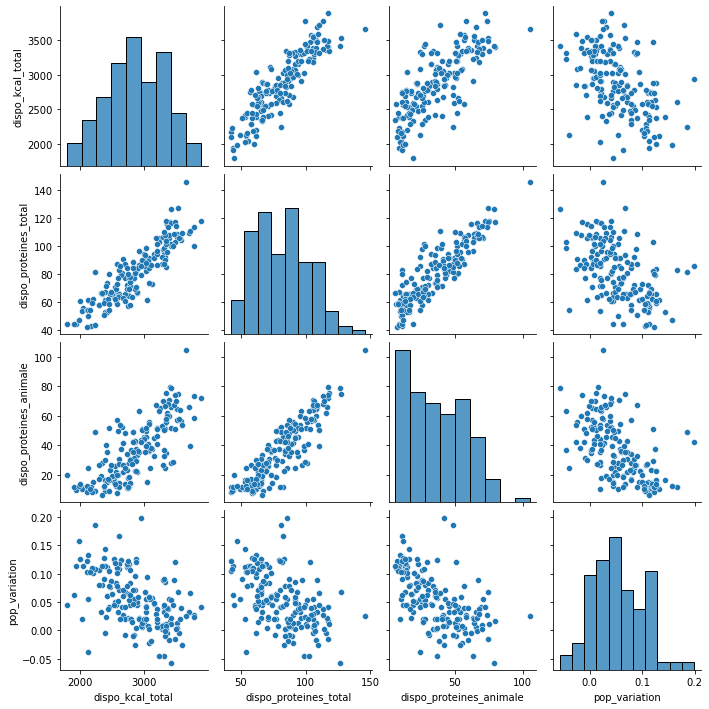

In [27]:
import seaborn as sns

# Pairwise correlation : Etude des dépendence entre plusieurs variables en même temps
sns.pairplot(pop_food[['dispo_kcal_total','dispo_proteines_total','dispo_proteines_animale','pop_variation']], diag_kind='hist')

<AxesSubplot:>

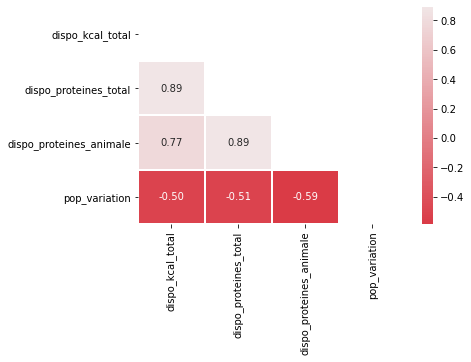

In [28]:
# Matrice de corrélation 
corr_temp = pop_food[['dispo_kcal_total','dispo_proteines_total','dispo_proteines_animale','pop_variation']].corr()
mask_temp = np.triu(np.ones_like(corr_temp, dtype=bool))

#Visualiser corrélation matrice
cmap=sns.diverging_palette(h_neg=10,
                          h_pos=240,
                          as_cmap=True)

sns.heatmap(pop_food[['dispo_kcal_total','dispo_proteines_total','dispo_proteines_animale','pop_variation']].corr(), mask=mask_temp,
            center=1, cmap=cmap, linewidths=1,
           annot=True, fmt=".2f")


#### Correlation positive entre disponibilité de proteines (total) et:
 - disponibilité de kcal (total)
 - disponibilité de protéines d'origine animale

#### Correlation negative entre variation de population:
 - disponibilité de proteines (total), 
 - disponibilité de kcal (total)
 - disponibilité de protéines d'origine animale

In [29]:
#Remplacer valeurs nulles par 0
data_model = pop_food.fillna(0)

In [30]:
#Préparation Df pour PCA : selectionner les colonnes necessaires
data_pca = data_model[['pays','dispo_kcal_total','dispo_proteines_total','dispo_proteines_animale','pop_variation']]
print(data_pca.shape)
data_pca.head()

(169, 5)


,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation
0,Armenia,2997.0,94.35,45.34,0.013506
1,Afghanistan,2040.0,55.52,10.79,0.113906
2,Albania,3360.0,115.74,61.75,-0.004684
3,Algeria,3322.0,91.83,24.73,0.084902
4,Angola,2385.0,53.05,16.31,0.143569


# B- Analyse statistique inferientielle 
Tester si chacune des variables suit une loi normale

### Affichage d'une distribution Gausienne

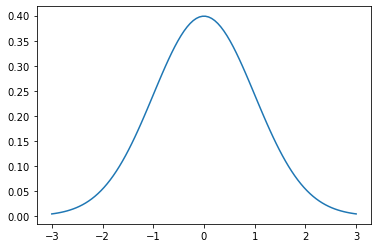

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

## Histogramme des variables

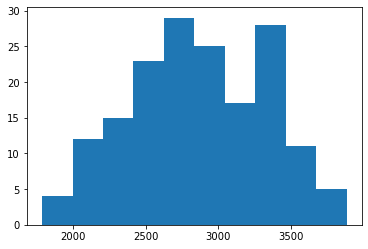

In [32]:
# histogram plot
fig = pyplot.hist(data_pca['dispo_kcal_total'])
pyplot.show()

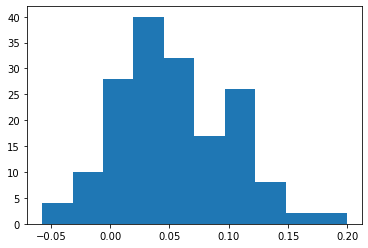

In [33]:
pyplot.hist(data_pca['pop_variation'])
pyplot.show()

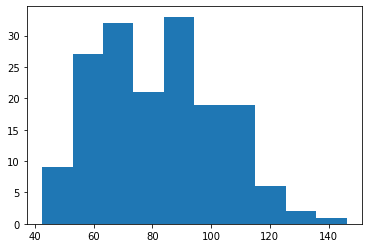

In [34]:
pyplot.hist(data_pca['dispo_proteines_total'])
pyplot.show()

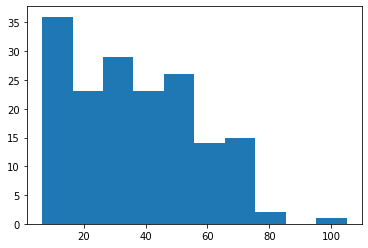

In [35]:
pyplot.hist(data_pca['dispo_proteines_animale'])
pyplot.show()

## qq plot

diagramme Q-Q (quantile-quantile) est un diagramme  permettant de comparer deux distributions de probabilité en traçant leurs quantiles l'un par rapport à l'autre.
Si les deux distributions comparées sont similaires, les points du graphique Q-Q se situeront approximativement sur la ligne y = x.

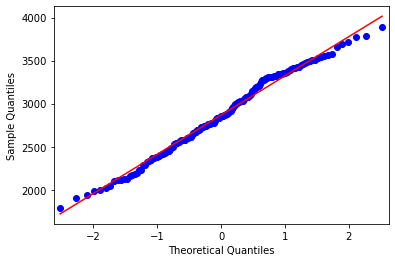

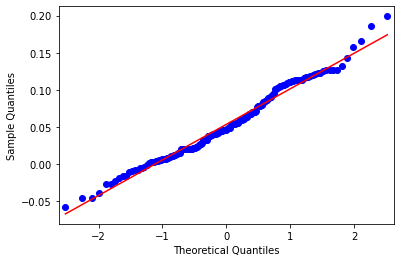

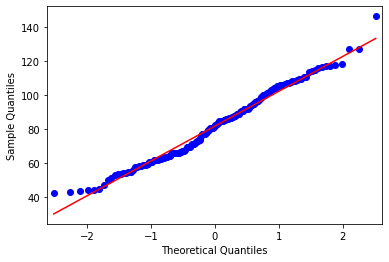

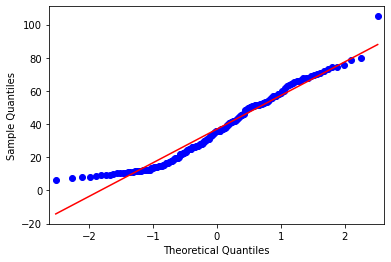

In [36]:
import statsmodels.api as sm
fig = sm.qqplot(data_pca['dispo_kcal_total'], line='s')
fig = sm.qqplot(data_pca['pop_variation'], line='s')
fig = sm.qqplot(data_pca['dispo_proteines_total'], line='s')
fig = sm.qqplot(data_pca['dispo_proteines_animale'], line='s')
plt.show()

## Test de normalité

In [37]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['dispo_kcal_total'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.986, p=0.099
L'echantillon semble Gaussien (validation H0)


In [38]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['pop_variation'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.983, p=0.035
'L'echantillon n'est pas Gaussien (Reject H0)


In [39]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['dispo_proteines_total'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.982, p=0.026
'L'echantillon n'est pas Gaussien (Reject H0)


In [40]:
# Shapiro-Wilk Test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro

# seed the random number generator
seed(1)

# normality test
stat, p = shapiro(data_pca['dispo_proteines_animale'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.954, p=0.000
'L'echantillon n'est pas Gaussien (Reject H0)


## Analyse

Les tests supposent que l'échantillon a été tiré d'une distribution gaussienne. Techniquement, cela s'appelle l'hypothèse nulle, ou H0. On choisit un niveau seuil appelé alpha, généralement 5 % (ou 0,05), qui est utilisé pour interpréter la valeur p.

- p <= alpha : rejeter H0, non normal.
- p > alpha : ne rejette pas H0, normal.

Cela signifie qu'en général, nous cherchons des résultats avec une valeur p plus grande pour confirmer que notre échantillon a probablement été tiré d'une distribution gaussienne.

Dans notre cas les resultats des tests montrent que dans la data_pca uniquement dispo_kcal_total suit probablement une loi normale.


# C - Analyse en composantes principales : ACP

#### Technique de réduction de la dimensionnalité qui permet d'identifier des corrélations et des modèles dans un ensemble de données afin de le transformer en un ensemble de données de dimension nettement inférieure sans perte d'informations importantes. Elle permet :

- de réduire les dimensions des données en enlevant la redondance des données,

- étudier la variabilité des individus (leurs ressemblances et différences) ;

- étudier les liaisons entre les variables 
#### https://www.edureka.co/blog/principal-component-analysis/

#### ETAPE 1 : Standardisation des données 
- Mise à l'échelle des données : centrer et mettre à l'échelle les données. 
- La valeur moyenne de chaque enregistrement sera égale à 0 et la variance de chaque enregistrement sera égale à 1
- Normalisation : pour éviter les biais dans le résultat final.

In [41]:
#Separate features from target and standardize features

from sklearn.preprocessing import StandardScaler

features = ['pop_variation', "dispo_proteines_animale", "dispo_kcal_total", "dispo_proteines_total"]

# Separating out the features
x = data_pca.loc[:, features].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

In [42]:
#feat_cols = ['feature'+str(i) for i in range(x.shape[1])]
#Renommer les colonnes
feat_cols = ['pop_variation', "dispo_proteines_animale", "dispo_kcal_total", "dispo_proteines_total"]

In [43]:
normalised_x = pd.DataFrame(x,columns=feat_cols)
normalised_x.tail()

,pop_variation,dispo_proteines_animale,dispo_kcal_total,dispo_proteines_total
164,0.755370,1.509309,1.311480,1.326042
165,-1.340278,0.255096,-0.086181,0.139288
166,-1.077450,1.647514,1.388275,1.613325
167,0.985093,-0.826361,-0.634714,-0.416713
168,-0.697462,0.198826,0.736618,0.979152


#### ETAPE 2 : Exécution de l'ACP : création nouvelles composantes

In [44]:
from sklearn.decomposition import PCA
pca_alim = PCA(n_components=3)
principalComponents_alim = pca_alim.fit_transform(normalised_x)


principalDf = pd.DataFrame(data = principalComponents_alim
             , columns = ['PC1','PC2', 'PC3'])
principalDf.tail()

,PC1,PC2,PC3
164,1.890388,1.602759,0.349756
165,0.702856,-1.170497,0.073748
166,2.893128,0.068724,0.172272
167,-1.385646,0.503100,-0.048352
168,1.294686,-0.102239,-0.399617


#### Analyse 
- On choisit n-1 composantes pour analyser le nombre optimal de composantes à prendre en compte dans l'ACP

In [45]:
#Ajout de la colonne qualitative
finalDf = pd.concat([principalDf, data_pca[['pays']]], axis = 1)
finalDf.head()

,PC1,PC2,PC3,pays
0,1.041102,-0.443610,0.028415,Armenia
1,-2.812248,0.108488,0.420315,Afghanistan
2,2.598253,-0.165267,0.068781,Albania
3,0.208272,0.980143,-0.998694,Algeria
4,-2.589536,0.877704,0.169034,Angola


#### ETAPE 3 :  Explication de la variance des composantes avec un Scree plot 
- permet de visualiser le pourcentage de variation capturé par chacune des composantes principales

In [46]:
print('Explained variation per principal component: {}'.format(pca_alim.explained_variance_ratio_))

# Les deux premieres composantes expliquent 92% de la vairance de notre echantillon

Explained variation per principal component: [0.77732769 0.15201289 0.05501599]


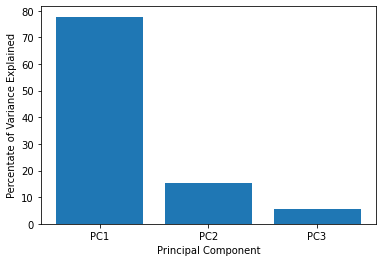

In [47]:
#Visulisation de la variance expliquée par chaque composantes
#permet de selectionner le nombre optimale de composantes principales

percent_variance = np.round(pca_alim.explained_variance_ratio_* 100, decimals =2)
columns = ['PC1', 'PC2', 'PC3']
plt.bar(x= range(1,4), height=percent_variance, tick_label=columns)
plt.ylabel('Percentate of Variance Explained')
plt.xlabel('Principal Component')
plt.show()

In [48]:
#Somme cumulée de la variation des composantes 
np.cumsum(pca_alim.explained_variance_ratio_)

array([0.77732769, 0.92934057, 0.98435656])

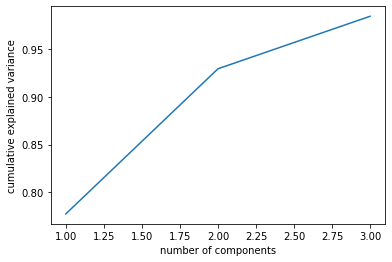

In [49]:
#Methode du coude
x = [1, 2, 3]
y = np.cumsum(pca_alim.explained_variance_ratio_)
plt.plot(x,y)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

### Analyse 
- On selectionne 2 composantes qui expliquent 92,9 % de la variance de notre échantillon
- La methode du coude permet de selectionner PC1 et PC2


### ETAPE 4 : Cercle de correlation

#### Cercle de correlation 
- La corrélation entre une variable et une composante principale (PC) est utilisée comme coordonnées de la variable sur la composante principale. 
- La représentation des variables diffère de celle des observations: les observations sont représentées par leurs projections, mais les variables sont représentées par leurs corrélations (Abdi and Williams 2010)

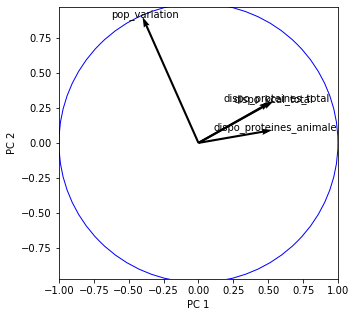

In [50]:
# Télécharcher les composantes(loadings)
PCs = pca_alim.components_

# Utiliser quiver to generate the basic plot
fig = plt.figure(figsize=(5,5))
plt.quiver(np.zeros(PCs.shape[1]), np.zeros(PCs.shape[1]),
           PCs[0,:], PCs[1,:], 
           angles='xy', scale_units='xy', scale=1)

# Add labels based on feature names (here just numbers)
feature_names = feat_cols
for i,j,z in zip(PCs[1,:]+0.02, PCs[0,:]+0.02, feature_names):
    plt.text(j, i, z, ha='center', va='center')

# Add unit circle
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

# Ensure correct aspect ratio and axis limits
plt.axis('equal')
plt.xlim([-1.0,1.0])
plt.ylim([-1.0,1.0])

# Label axes
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# Done
plt.show()

#### Analyse 
- PC1: est influencé par la disponibilité en proteine animale, la disponibilité en Kcal et disponibilité en proteine totale 
- PC2 : est influencé par la variation de la population

#### Le graphique ci-dessus est également connu sous le nom de graphique de corrélation des variables. Il montre les relations entre toutes les variables. Il peut être interprété comme suit:

- Les variables positivement corrélées sont regroupées.
- Les variables négativement corrélées sont positionnées sur les côtés opposés de l’origine du graphique (quadrant opposé).
- La distance entre les variables et l’origine mesure la qualité de représentation des variables. 

# Mission 5 : Visualisez vos  partitions dans le premier plan factoriel obtenu par ACP

Text(0, 0.5, 'PC2')

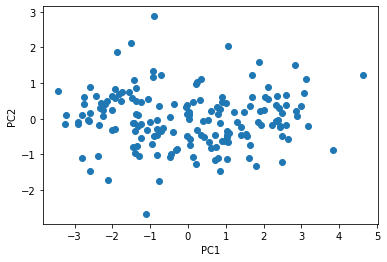

In [51]:
plt.scatter(finalDf.PC1, finalDf.PC2)
plt.xlabel('PC1')
plt.ylabel('PC2')

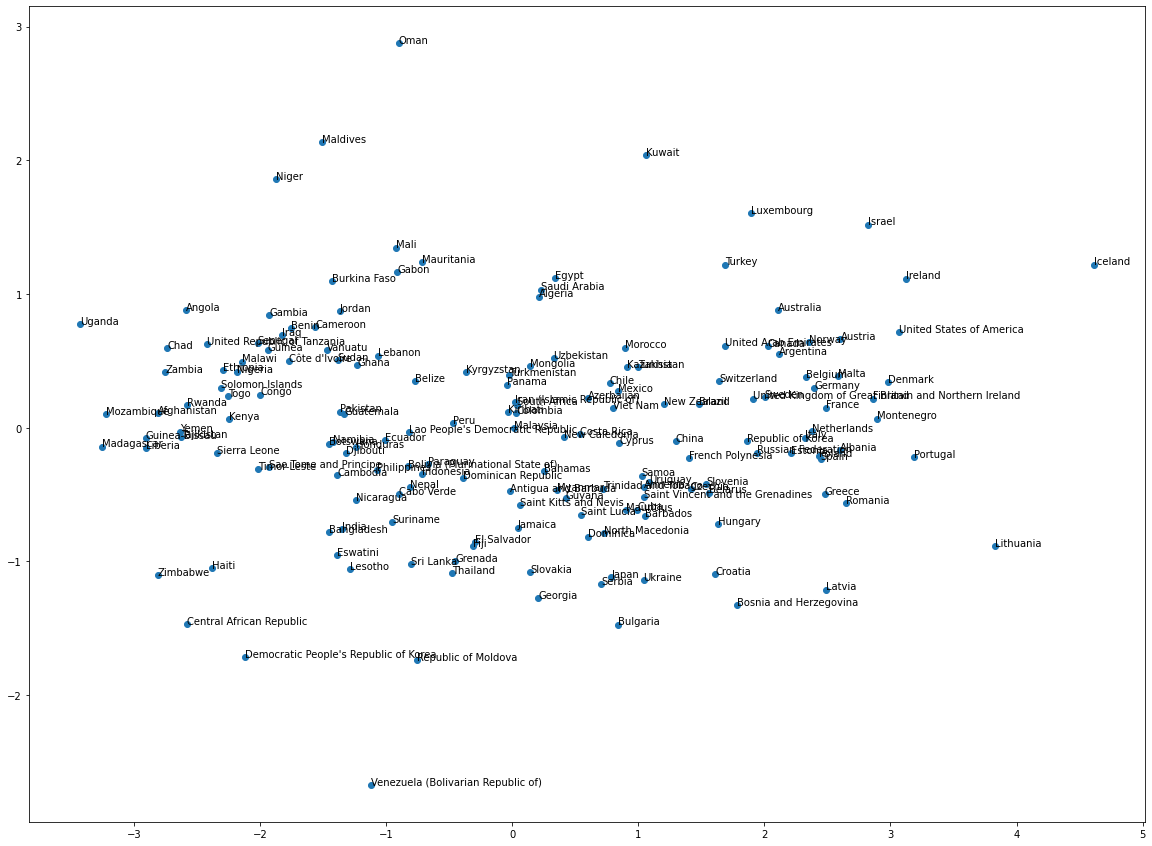

In [52]:
x = finalDf['PC1'] 
y =  finalDf['PC2']
n = finalDf['pays']


fig, ax = plt.subplots()
fig.set_size_inches(20, 15)
ax.scatter(x, y)
for i, txt in enumerate(n):
    ax.annotate(txt, (x[i], y[i]))

#### Analyse 
- Les pays à droite sont des pays ayant des composantes alimentaires élevées
- les pays en haut: ont une variation en population élevée 

## CLUSTURING HIERACHIQUE

## D : Construire un dendrogramme contenant l'ensemble des pays étudiés

In [53]:
data_cluster = data_model[['pays','dispo_kcal_total','dispo_proteines_total','dispo_proteines_animale','pop_variation']].set_index('pays')

In [54]:
data_cluster.head()

,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation
pays,,,,
Armenia,2997.0,94.35,45.34,0.013506
Afghanistan,2040.0,55.52,10.79,0.113906
Albania,3360.0,115.74,61.75,-0.004684
Algeria,3322.0,91.83,24.73,0.084902
Angola,2385.0,53.05,16.31,0.143569


In [55]:
#Vérifier la variation de la population 
test = data_cluster.reset_index()
test[test['pays'].isin(['Oman', 'Niger', 'France', 'Japan'])].head()

,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation
43,France,3502.0,108.25,64.45,0.012415
73,Japan,2705.0,87.36,48.60,-0.007540
108,Niger,2601.0,82.60,11.67,0.166456
146,Oman,2940.0,85.36,42.07,0.199196


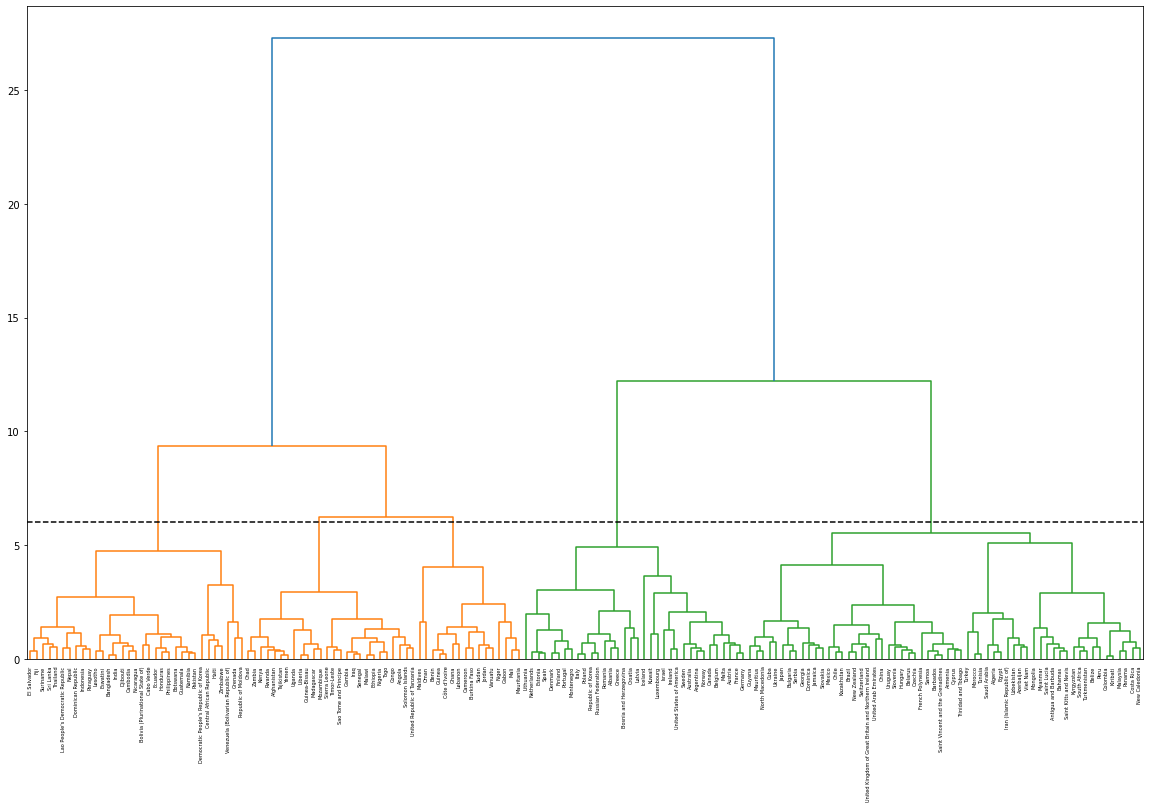

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram

# import de l'échantillon 
data = data_cluster

# préparation des données pour le clustering
X = data.values
names = data_cluster.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Clustering hiérarchique
Z = linkage(X_scaled, method='ward', metric='euclidean')

# Affichage du dendrogramme
plt.figure(figsize=(20,12))
dendrogram(Z, labels=names, leaf_rotation = 90)

# Coupage du dendrogramme en 5 clusters
clusters = fcluster(Z, 5, criterion='maxclust')
plt.axhline(y=6 ,color='black', linestyle='dashed')
plt.title=('Premier dendrogram 5 clusters avec 4 variables choisi au début')

<function matplotlib.pyplot.show(close=None, block=None)>

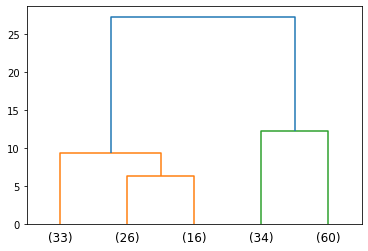

In [57]:
#Calcule nombre de pays dans chaque cluster
dendrogram(Z, truncate_mode='lastp', p=5)
plt.show

In [58]:
#Ajout colonne cluster 
data_cluster['cluster']=clusters
data_cluster.head()

,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation,cluster
pays,,,,,
Armenia,2997.0,94.35,45.34,0.013506,5
Afghanistan,2040.0,55.52,10.79,0.113906,2
Albania,3360.0,115.74,61.75,-0.004684,4
Algeria,3322.0,91.83,24.73,0.084902,5
Angola,2385.0,53.05,16.31,0.143569,2


In [59]:
# Export data cluster pour la presentation du projet
data_export=data_cluster.reset_index()
data_export[['pays', 'cluster']].to_csv("./Data/data_cluster.csv")

## E - Analyse statistique des cluster

Dans la partie ci-dessous nous allons analyser les populations de nos clusters en performant des test statistiques.
Cela permettra d'indiquer si les differences de moyennes entre les clusters sont significativements differentes.

## Analyse Descriptives

In [60]:
#ANALYSE GROUPE 1
data_cluster_analysis = data_cluster.reset_index()
cluster1 = data_cluster_analysis[data_cluster_analysis['cluster'].isin([1])]
print(cluster1.shape)
groupe1 = cluster1.sort_values(by = 'dispo_proteines_animale', ascending=False)
groupe1.head(10)

(33, 6)


,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation,cluster
54,Grenada,2402.0,71.32,40.41,0.023434,1
12,Bolivia (Plurinational State of),2412.0,73.24,35.46,0.060395,1
35,Dominican Republic,2892.0,66.31,33.48,0.045445,1
37,Ecuador,2606.0,65.96,30.73,0.070996,1
99,Republic of Moldova,2383.0,61.64,30.27,-0.005269,1
41,Fiji,2781.0,71.14,28.43,0.019655,1
114,Paraguay,2768.0,69.40,28.08,0.054025,1
13,Botswana,2342.0,65.89,28.02,0.079215,1
143,Thailand,2804.0,63.36,27.06,0.014461,1
39,El Salvador,2696.0,77.03,26.91,0.019955,1


In [61]:
#ANALYSE GROUPE 2
cluster2 = data_cluster_analysis[data_cluster_analysis['cluster'].isin([2])]
print(cluster2.shape)
groupe2 = cluster2.sort_values(by = 'dispo_proteines_animale', ascending=False)
groupe2.head(10)

(26, 6)


,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation,cluster
27,Congo,2285.0,58.16,26.39,0.107111,2
120,Timor-Leste,2287.0,58.02,17.04,0.079742,2
48,Gambia,2533.0,65.81,16.78,0.126505,2
128,Sao Tome and Principe,2446.0,54.53,16.58,0.078175,2
4,Angola,2385.0,53.05,16.31,0.143569,2
16,Solomon Islands,2415.0,53.14,15.37,0.112043,2
76,Kenya,2197.0,61.75,14.92,0.100482,2
66,Iraq,2608.0,65.53,14.57,0.116868,2
162,Zambia,2002.0,60.53,13.70,0.126750,2
130,Senegal,2545.0,62.36,13.69,0.118491,2


In [62]:
#ANALYSE GROUPE 3
cluster3 = data_cluster_analysis[data_cluster_analysis['cluster'].isin([3])]
print(cluster3.shape)
groupe3 = cluster3.sort_values(by = 'dispo_proteines_animale', ascending=False)
groupe3.head(10)

(16, 6)


,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation,cluster
90,Maldives,2235.0,81.29,49.09,0.185467,3
146,Oman,2940.0,85.36,42.07,0.199196,3
47,Gabon,2633.0,79.18,37.38,0.125000,3
93,Mauritania,2877.0,82.12,29.66,0.120180,3
105,Vanuatu,2607.0,63.95,27.31,0.109107,3
74,Jordan,2732.0,69.21,23.22,0.117335,3
83,Lebanon,2857.0,69.15,22.47,0.095569,3
91,Mali,2873.0,83.59,22.47,0.126580,3
167,Sudan,2578.0,72.98,20.15,0.100688,3
51,Ghana,3035.0,61.60,15.37,0.093395,3


In [63]:
#ANALYSE GROUPE 4
data_cluster_analysis = data_cluster.reset_index()
cluster4 = data_cluster_analysis[data_cluster_analysis['cluster'].isin([4])]
print(cluster4.shape)
groupe4 = cluster4.sort_values(by = 'dispo_proteines_animale', ascending=False)
groupe4.head(10)

(34, 6)


,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation,cluster
62,Iceland,3654.0,146.13,104.98,0.024708,4
33,Denmark,3401.0,117.08,79.73,0.015524,4
86,Lithuania,3411.0,126.65,78.85,-0.057289,4
42,Finland,3343.0,117.99,75.43,0.011199,4
68,Israel,3528.0,126.94,74.69,0.067136,4
118,Portugal,3480.0,116.95,74.37,-0.015552,4
153,United States of America,3782.0,113.74,73.48,0.026431,4
67,Ireland,3885.0,117.58,72.01,0.041464,4
7,Australia,3391.0,105.94,70.70,0.055166,4
166,Montenegro,3500.0,114.53,70.27,0.001858,4


In [64]:
#ANALYSE GROUPE 5
cluster5 = data_cluster_analysis[data_cluster_analysis['cluster'].isin([5])]
print(cluster5.shape)
groupe5 = cluster5.sort_values(by = 'dispo_proteines_animale', ascending=False)
groupe5.head(10)

(60, 6)


,pays,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation,cluster
44,French Polynesia,2910.0,96.28,63.59,0.021987,5
140,Switzerland,3354.0,95.47,59.86,0.038948,5
151,United Kingdom of Great Britain and Northern I...,3344.0,103.92,57.96,0.026270,5
96,Mongolia,2579.0,87.31,56.85,0.078265,5
71,Kazakhstan,3067.0,91.49,54.70,0.058777,5
14,Brazil,3301.0,95.68,53.77,0.033071,5
126,Saint Lucia,2618.0,85.82,53.53,0.020152,5
113,Czechia,3277.0,86.98,52.83,0.007041,5
9,Bahamas,2655.0,80.69,52.40,0.040482,5
36,Belarus,3270.0,91.95,52.20,0.002214,5


# Mission 3 : Caractérisez chacun de ces groupes selon les variables cités précédemment, et facultativement selon d'autres variables que vous jugerez pertinentes (ex : le PIB par habitant). Vous pouvez le faire en calculant la position des centroïdes de chacun des groupes, puis en les commentant et en les critiquant au vu de vos objectifs.

In [65]:
# Group by the cluster : permet de caractériser chaque groupe
data_cluster_summary = data_cluster.groupby('cluster').agg({'pop_variation':'mean','dispo_proteines_total':'mean', 'dispo_proteines_animale':'mean','dispo_kcal_total':'mean'})
data_cluster_summary.head()

,pop_variation,dispo_proteines_total,dispo_proteines_animale,dispo_kcal_total
cluster,,,,
1,0.045875,64.300606,22.567576,2511.545455
2,0.113029,56.070000,12.457308,2277.500000
3,0.125659,72.628750,22.600625,2732.312500
4,0.014875,110.086471,65.543529,3449.500000
5,0.034501,88.171667,42.933500,3024.566667


In [66]:
# Export data cluster pour la presentation du projet
data_export_centroides=data_cluster_summary.reset_index()
data_export_centroides.to_csv("./Data/data_export_centroides.csv")

Text(0, 0.5, 'croissance population')

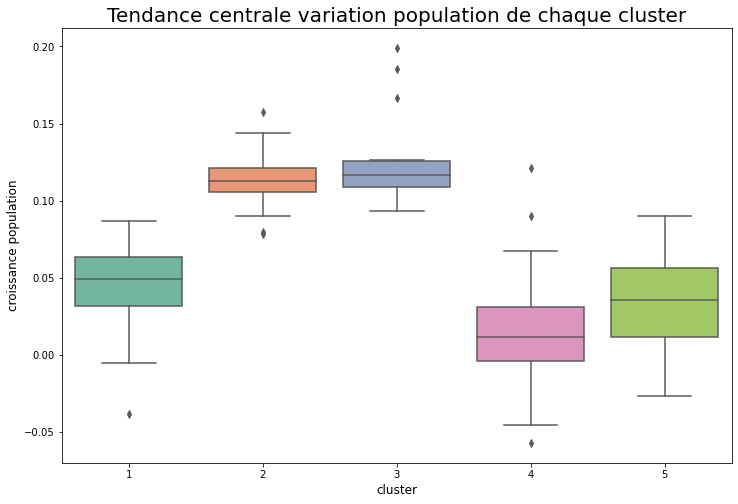

In [67]:

plt.figure(figsize=(12,8))
ax = sns.boxplot(x="cluster", y="pop_variation", data=data_cluster,  palette="Set2",
                 order=[1,2,3,4,5]).set_title('Tendance centrale variation population de chaque cluster', size=20)
plt.xlabel("cluster", size=12)
plt.ylabel("croissance population", size=12)



#### Commentaire : les pays dans les clusters 2 et 3 ont une croissance en population élevée que les clusters 4 et 5 

Text(0, 0.5, 'disponibilité alimentaire')

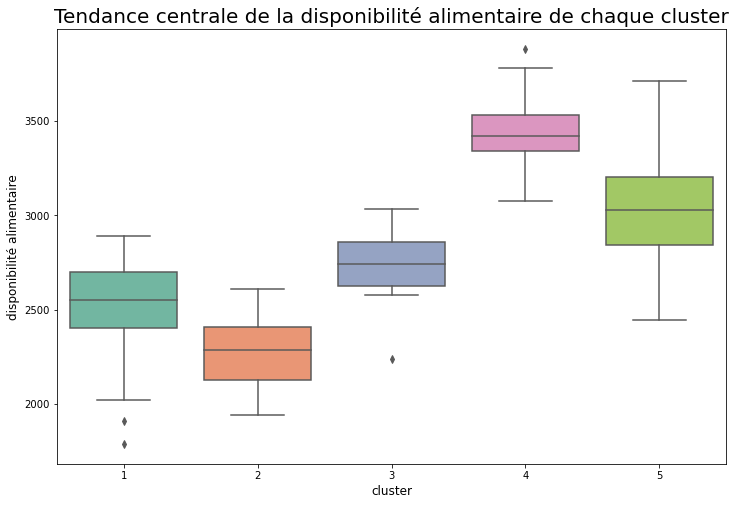

In [68]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="cluster", y="dispo_kcal_total", data=data_cluster,  palette="Set2",
                 order=[1,2,3,4,5]).set_title('Tendance centrale de la disponibilité alimentaire de chaque cluster', size=20)
plt.xlabel("cluster", size=12)
plt.ylabel("disponibilité alimentaire", size=12)

#### Commentaire : en 2018, les pays dans clusters 4, 5 ont le plus disponibilité totale de kcal, que les pays dans les cluster 1 et 2

Text(0, 0.5, 'disponibilité des proteines')

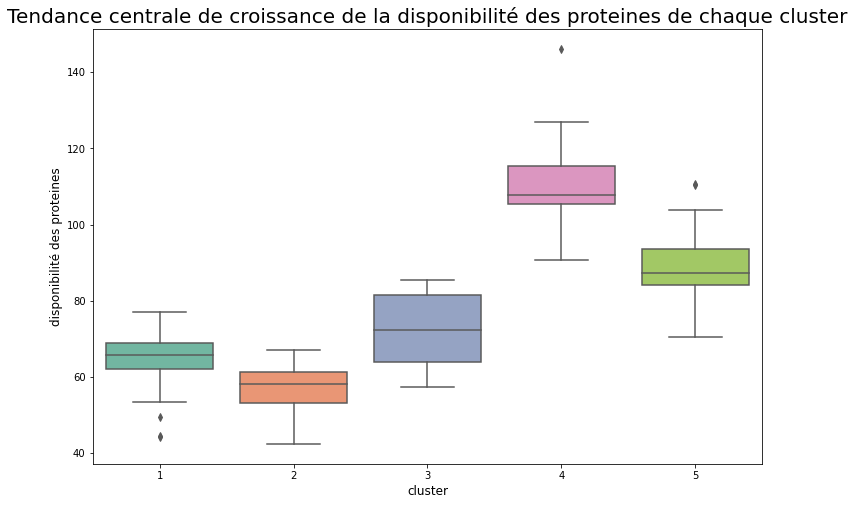

In [69]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="cluster", y="dispo_proteines_total", data=data_cluster,  palette="Set2",
                 order=[1,2,3,4,5]).set_title('Tendance centrale de croissance de la disponibilité des proteines de chaque cluster', size=20)
plt.xlabel("cluster", size=12)
plt.ylabel("disponibilité des proteines", size=12)

#### Commentaire : en 2018, les pays dans clusters 4, 5, ont le plus disponibilité totale de protéines, que les pays dans les cluster 1 et 2

Text(0, 0.5, 'disponibilité proteine animale')

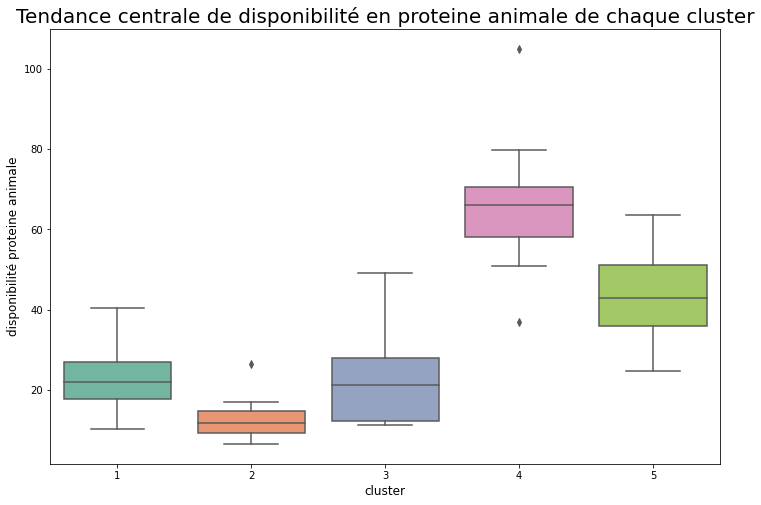

In [70]:
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="cluster", y="dispo_proteines_animale", data=data_cluster,  palette="Set2",
                 order=[1,2,3,4,5]).set_title('Tendance centrale de disponibilité en proteine animale de chaque cluster', size=20)
plt.xlabel("cluster", size=12)
plt.ylabel("disponibilité proteine animale", size=12)

#### Commentaire : en 2018, les pays dans clusters 4, 5, ont le plus disponibilité de protétines animales, que les pays dans les cluster 1 et 2

- On peut donc cibler les pays dans les clusters 4 et 5 => forte disponibilité en proteine animale

### Analyse variable suivant une loi normal et cluster

Text(0, 0.5, 'dispo_kcal_total')

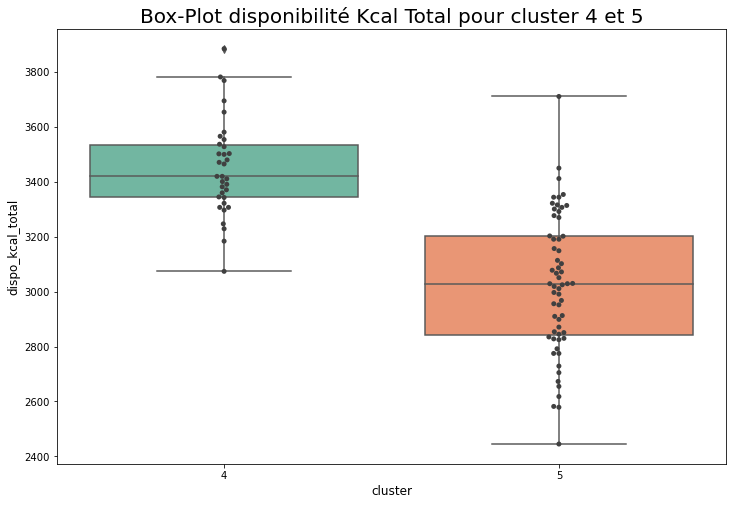

In [71]:
data_viz_cluster = data_cluster[data_cluster['cluster'].isin([4,5])]
plt.figure(figsize=(12,8))
ax = sns.boxplot(x="cluster",
                 y="dispo_kcal_total",
                 data=data_viz_cluster,
                 palette="Set2").set_title('Box-Plot disponibilité Kcal Total pour cluster 4 et 5', size=20)
ax = sns.swarmplot(x="cluster",
                   y="dispo_kcal_total",
                   data=data_viz_cluster, color=".25")
plt.xlabel("cluster", size=12)
plt.ylabel("dispo_kcal_total", size=12)

In [72]:
# Analyse : 

# Mission 4 : Donnez une courte liste de pays à cibler, en présentant leurs caractéristiques. Un découpage plus précis qu'en 5 groupes peut si besoin être effectué pour cibler un nombre raisonnable de pays. 


In [73]:
# Extraire le cluster 5
cluster_5=data_cluster[data_cluster['cluster']==5]
cluster_5.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, Armenia to China
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dispo_kcal_total         60 non-null     float64
 1   dispo_proteines_total    60 non-null     float64
 2   dispo_proteines_animale  60 non-null     float64
 3   pop_variation            60 non-null     float64
 4   cluster                  60 non-null     int32  
dtypes: float64(4), int32(1)
memory usage: 2.6+ KB


In [74]:
cluster_5.sort_values(by='dispo_proteines_animale', ascending=False)[:10]

,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation,cluster
pays,,,,,
French Polynesia,2910.0,96.28,63.59,0.021987,5
Switzerland,3354.0,95.47,59.86,0.038948,5
United Kingdom of Great Britain and Northern Ireland,3344.0,103.92,57.96,0.026270,5
Mongolia,2579.0,87.31,56.85,0.078265,5
Kazakhstan,3067.0,91.49,54.70,0.058777,5
Brazil,3301.0,95.68,53.77,0.033071,5
Saint Lucia,2618.0,85.82,53.53,0.020152,5
Czechia,3277.0,86.98,52.83,0.007041,5
Bahamas,2655.0,80.69,52.40,0.040482,5


In [75]:
# Extraire le cluster 5
cluster_4=data_cluster[data_cluster['cluster']==4]
cluster_4.info()

cluster_4.sort_values(by='dispo_proteines_animale', ascending=False)[:10]

<class 'pandas.core.frame.DataFrame'>
Index: 34 entries, Albania to Montenegro
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   dispo_kcal_total         34 non-null     float64
 1   dispo_proteines_total    34 non-null     float64
 2   dispo_proteines_animale  34 non-null     float64
 3   pop_variation            34 non-null     float64
 4   cluster                  34 non-null     int32  
dtypes: float64(4), int32(1)
memory usage: 1.5+ KB


,dispo_kcal_total,dispo_proteines_total,dispo_proteines_animale,pop_variation,cluster
pays,,,,,
Iceland,3654.0,146.13,104.98,0.024708,4
Denmark,3401.0,117.08,79.73,0.015524,4
Lithuania,3411.0,126.65,78.85,-0.057289,4
Finland,3343.0,117.99,75.43,0.011199,4
Israel,3528.0,126.94,74.69,0.067136,4
Portugal,3480.0,116.95,74.37,-0.015552,4
United States of America,3782.0,113.74,73.48,0.026431,4
Ireland,3885.0,117.58,72.01,0.041464,4
Australia,3391.0,105.94,70.70,0.055166,4


# F- Statistique inferentielle (Partie 2)

### Mission 6 : Dans votre partition, vous avez obtenu des groupes distincts. Vérifiez donc qu'ils diffèrent réellement. Pour cela, réalisez les tests statistiques suivants :


- un test d'adéquation : parmi les 4 variables, ou parmi d'autres variables que vous trouverez pertinentes
- un test de comparaison de deux populations (dans le cas gaussien) : choisissez 2 clusters parmi ceux que vous aurez déterminé. Sur ces 2 clusters, testez la variable gaussienne grâce à un test de comparaison

#### Objectif test : prouver que les cluster ont une bonne repartition, d'un cluster à un autre et valider la pertinance de la création de chaque cluster

In [76]:
# https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/
# https://www.marsja.se/levenes-bartletts-test-of-equality-homogeneity-of-variance-in-python/
# https://www.marsja.se/how-to-perform-a-two-sample-t-test-with-python-3-different-methods/
# https://www.marsja.se/how-to-perform-mann-whitney-u-test-in-python-with-scipy-and-pingouin/

Dans la partie statistiques inferentielle 1 nous avons vu que la variable dispo_kcal_total suivait une loi normale. Les autres variables non.

### Afin de comparer les deux groupe nous devons valider des hypotheses statistiques, notamment pour effectuer un test de student

Hypothèses

- Hypothèse 1 : les deux échantillons sont-ils indépendants ?
- Hypothèse 2 : les données de chacun des deux groupes suivent-elles une distribution normale ?
- Hypothèse 3 : Les deux échantillons ont-ils les mêmes variances (Homogénéité de la variance) ?



##  Clusters 4 et 5 - Variable dispo_kcal_total

### 1 : Test de Kolmogorov-Smirnov : test d'independance des échantillons
-  test de Kolmogorov-Smirnov à deux échantillons : est un test non paramétrique qui compare les distributions cumulatives de deux ensembles de données (1,2).
- L'hypothèse nulle est que les deux groupes ont été échantillonnés à partir de populations ayant des distributions identiques.Il teste toute violation de cette hypothèse nulle - médianes différentes, variances différentes ou distributions différentes.


In [77]:
from scipy.stats import ks_2samp
import numpy as np
x = cluster_4['dispo_kcal_total']
z = cluster_5['dispo_kcal_total']

stats.ks_2samp(x, z)


KstestResult(statistic=0.707843137254902, pvalue=4.681066645417786e-11)

#### Analyse : 
- on peut comparer la valeur p à un niveau de signification a, généralement a = 0,05 ou 0,01 (vous décidez que plus a est bas, plus il est significatif). 
- Si la valeur p est inférieure à a, alors il est très probable que les deux distributions soient différentes.
- Ici, p-value est de 0.0, inférieur à a : on peut donc dire que les deux cluster sont différentes. 
- Les deux echantillons sont donc bien independants 
- Ceci confirme ce qu’on aurait pu intuitivement deviner dans notre cas, car les groupes ont été crée en utilsant une méthode de clustering.

### 2 : Test de normalite pour chacun des groupes

In [78]:
# normality test cluster 4
stat, p = shapiro(cluster_4['dispo_kcal_total'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.977, p=0.686
L'echantillon semble Gaussien (validation H0)


In [79]:
# normality test cluster 5
stat, p = shapiro(cluster_5['dispo_kcal_total'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("'L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.989, p=0.878
L'echantillon semble Gaussien (validation H0)


Les deux groupes sur les variables dispo_kcal_total suivent une loi normale.

On peut donc utiliser le test de Bartlett afin de tester l'homogeneité des variances 

### 3 : Test homogénéité des variances

Hypothese des test
- Levene’s Test
- Bartlett’s Test of homogeneity of variance

Hypothèse nulle : les variances sont égales dans tous les échantillons/groupes.

Hypothèse alternative : les variances ne sont pas égales dans tous les échantillons/groupes.

In [80]:
# Berlette test sur Kcal total car cette variables suit une loi normale
from scipy.stats import bartlett

trt4 = data_cluster.query('cluster == 4')['dispo_kcal_total']
trt5 = data_cluster.query('cluster == 5')['dispo_kcal_total']

# Bartlett's test in Python with SciPy:
stat, p = bartlett( trt4, trt5)

# Get the results:
print(stat, p)

# interpret
alpha = 0.05
if p > alpha:
    print('the populations have equal variances. (fail to reject H0)')
else:
    print('the populations do not have equal variances. (reject H0)')



5.238987903488252 0.02208611931329862
the populations do not have equal variances. (reject H0)


Si les données ne répondent pas à l'hypothèse de variances égales, nous pouvons utiliser le test t de Welch au lieu du test t de Student.

En python on peut utiliser le package scipy.stats et le ttest_ind avec le paramètre equal_var = False lorsque le test de Berlett est rejetté.

In [81]:
stats.ttest_ind(cluster_4['dispo_kcal_total'],
                cluster_5['dispo_kcal_total'],
                equal_var=False)



Ttest_indResult(statistic=9.619948935833069, pvalue=2.1097701209438677e-15)

La p-value du test est de 2.10e-15, ce qui est inférieur au niveau de signification alpha (par exemple, 0,05).
On peut donc conclure que la dispo_kcal_total moyenne du cluster 4 est statistiquement différente de la dispo_kcal_total moyenne du cluster 5.

Ceci confirme ce qu’on aurait pu intuitivement deviner dans notre cas, car les groupes ont été crée en utilsant une méthode de clustering.

<AxesSubplot:xlabel='cluster', ylabel='dispo_kcal_total'>

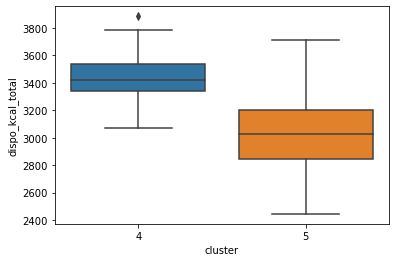

In [82]:
import seaborn as sns
sns.boxplot(x='cluster', y='dispo_kcal_total', data=data_cluster[data_cluster['cluster'].isin([4,5])])

<AxesSubplot:xlabel='cluster', ylabel='dispo_kcal_total'>

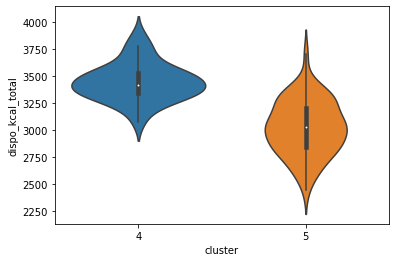

In [83]:
import seaborn as sns
sns.violinplot(x='cluster', y='dispo_kcal_total', data=data_cluster[data_cluster['cluster'].isin([4,5])])

## Clusters 2 et 3 - Variables pop_variation

### 1 : Test independances

In [84]:
from scipy.stats import ks_2samp
import numpy as np
x = cluster2['pop_variation']
z = cluster3['pop_variation']

stats.ks_2samp(x, z)

KstestResult(statistic=0.21634615384615385, pvalue=0.6494154759111745)

#### Analyse : 
- on peut comparer la valeur p à un niveau de signification a, généralement a = 0,05
- Si la valeur p est inférieure à a, alors il est très probable que les deux distributions soient différentes.
- Ici, p-value est de 0.68, superieur à a : on peut donc dire que les clusters 2 et 3 sur la variables pop variation ne sont pas independants.

### 2 : Test de normalite pour chacun des groupes

In [85]:
# normality test
stat, p = shapiro(cluster2['pop_variation'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.957, p=0.329
L'echantillon semble Gaussien (validation H0)


In [86]:
# normality test
stat, p = shapiro(cluster3['pop_variation'])

print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
alpha = 0.05
if p > alpha:
    print("L'echantillon semble Gaussien (validation H0)")
else:
    print("L'echantillon n'est pas Gaussien (Reject H0)")

Statistics=0.801, p=0.003
L'echantillon n'est pas Gaussien (Reject H0)


Le cluser 2 sur la varianles pop_variation suit une loi normale.

Le cluser 3 sur la varianles pop_variation ne suit pas une loi normale.

On doit donc utiliser le test de Levene afin de tester l'homogeneité des variances 

In [87]:
# Levene test on pop variation car pop variation en suit pas une loi normale
from scipy.stats import levene

# subsetting the data:

trt2 = data_cluster.query('cluster == 2')['pop_variation']
trt3 = data_cluster.query('cluster == 3')['pop_variation']

# Bartlett's test in Python with SciPy:
stat, p = levene(trt2, trt3)

# Get the results:
print(stat, p)

# interpret
alpha = 0.05
if p > alpha:
    print('les deux populations ont des variances égales. (fail to reject H0)')
else:
    print("les deux populations n'ont des variances égales. (reject H0)")


1.8048808406889891 0.18669599889313437
les deux populations ont des variances égales. (fail to reject H0)


In [88]:
stats.ttest_ind(cluster2['pop_variation'],
                cluster3['pop_variation'],
                equal_var=True)

Ttest_indResult(statistic=-1.7030118299287198, pvalue=0.09632539260833758)

La p-value du test est de 0.09, ce qui est superieur au niveau de signification alpha 0.05.
On peut donc conclure que la pop_variation moyenne du cluster 2 est statistiquement similaire de la pop_variation moyenne du cluster 3.

<AxesSubplot:xlabel='cluster', ylabel='pop_variation'>

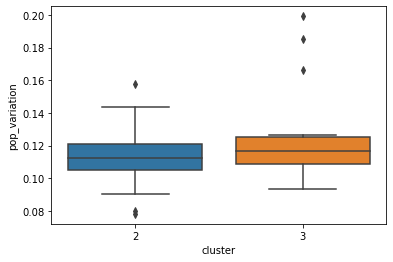

In [89]:
sns.boxplot(x='cluster', y='pop_variation', data=data_cluster[data_cluster['cluster'].isin([2,3])])

<AxesSubplot:xlabel='cluster', ylabel='pop_variation'>

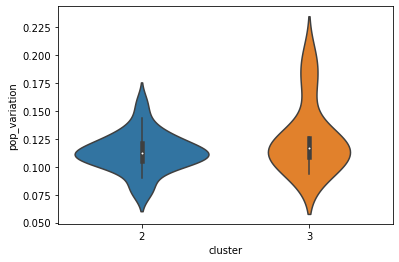

In [90]:
sns.violinplot(x='cluster', y='pop_variation', data=data_cluster[data_cluster['cluster'].isin([2,3])])